In [47]:
import matplotlib.pyplot as plt
import networkx as nx
import random

In [48]:
def plot_graph(G):
    """Plot the graph."""
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', edge_color='gray')
    plt.show()

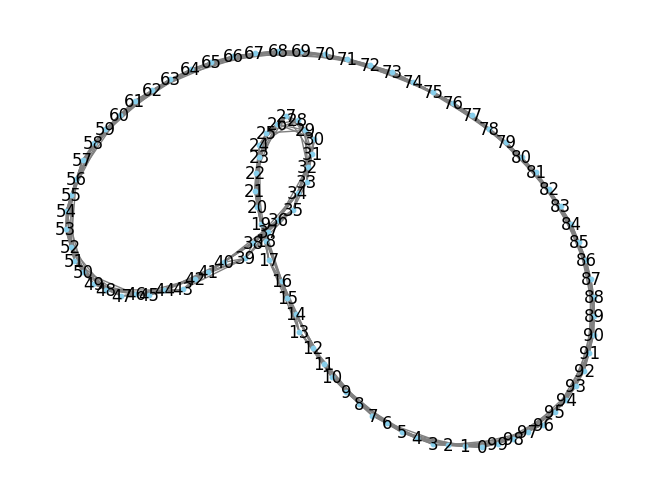

In [49]:
def generate_ring_lattice():
    """Generate a regular ring lattice with 10 vertices and 2 nearest neighbors."""
    return nx.watts_strogatz_graph(100, 8, 0)

G_ring_lattice = generate_ring_lattice()
plot_graph(G_ring_lattice)

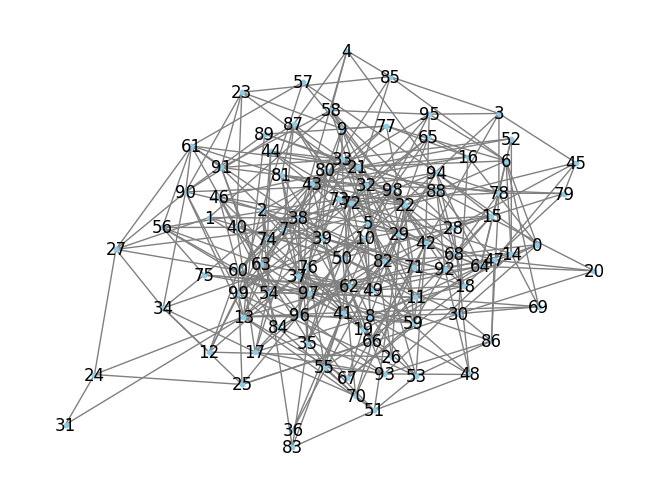

In [52]:
def generate_random_graph():
    """Generate a random graph with 10 vertices and 15 edges."""
    return nx.gnm_random_graph(100, 400)

G_random = generate_random_graph()
plot_graph(G_random)

E1 edges 
 {(55, 57), (26, 30), (67, 68), (70, 73), (29, 32), (8, 9), (40, 41), (11, 14), (41, 42), (73, 74), (44, 47), (3, 6), (14, 15), (74, 75), (15, 16), (47, 48), (96, 99), (18, 21), (1, 99), (48, 49), (80, 81), (81, 82), (25, 29), (22, 23), (55, 56), (88, 90), (59, 63), (29, 31), (77, 80), (92, 96), (62, 64), (33, 37), (0, 98), (3, 5), (51, 54), (84, 88), (95, 97), (66, 70), (36, 38), (7, 11), (96, 98), (58, 62), (21, 22), (69, 71), (40, 44), (10, 12), (91, 95), (54, 55), (25, 28), (73, 77), (32, 36), (43, 45), (14, 18), (87, 88), (17, 20), (65, 69), (28, 29), (76, 78), (47, 51), (88, 89), (6, 10), (50, 53), (29, 30), (77, 79), (61, 62), (80, 84), (39, 43), (2, 3), (83, 86), (62, 63), (94, 95), (0, 97), (24, 27), (72, 76), (3, 4), (51, 53), (35, 36), (84, 87), (95, 96), (9, 11), (57, 60), (36, 37), (68, 69), (58, 61), (42, 44), (90, 93), (69, 70), (31, 34), (10, 11), (91, 94), (32, 35), (16, 18), (64, 67), (43, 44), (5, 8), (17, 19), (65, 68), (49, 51), (76, 77), (6, 9), (50, 52)

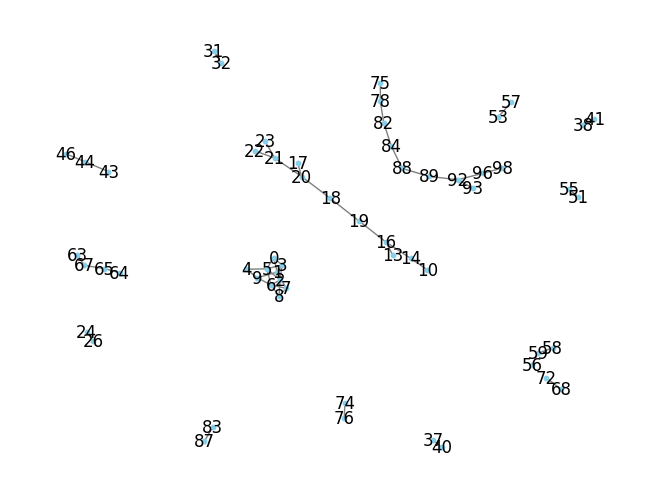

In [51]:
def morph_graphs(G1, G2, p):
    """Create a p-morph of G1 and G2."""
    E1 = set(G1.edges())
    E2 = set(G2.edges())
    print("E1 edges \n", E1)
    print("E2 edges \n", E2)
    E_common = E1 & E2  # Edges common to both graphs
    print("E_common edges \n", E_common)
    E1_exclusive = list(E1 - E2)  # Edges unique to G1
    print("E1_exclusive edges \n", E1_exclusive)
    E2_exclusive = list(E2 - E1)  # Edges unique to G2
    print("E2_exclusive edges \n", E2_exclusive)
    
    # Take a fraction of exclusive edges from each graph
    E_from_G1 = random.sample(E1_exclusive, int(p * len(E1_exclusive)))
    print("E_from_G1 edges \n", E_from_G1)
    E_from_G2 = random.sample(E2_exclusive, int((1 - p) * len(E2_exclusive)))
    print("E_from_G2 edges \n", E_from_G2)

    # Create the new graph by combining these edges
    E_morph = list(E_common) + E_from_G1 + E_from_G2
    print("E_morph edges \n", E_morph)
    
    G_morph = nx.Graph()
    G_morph.add_edges_from(E_morph)  # Add edges to the new graph
    return G_morph

G_morph = morph_graphs(G_ring_lattice, G_random, 0.1)
chromatic_number = nx.algorithms.coloring.greedy_color(G_morph)
plot_graph(G_morph)